## 1. (30 puntos) Optimización de funciones

Para las siguientes funciones:

\begin{equation}
f_{1}(x,y)=xe^{(-x^{2}-y^{2})}
\end{equation}


1. Grafique tal función, y distinga si las funciones son convexas o no, y los puntos mínimos y regiones o puntos silla.


In [41]:
import math
import torch
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib import cm
from torch.autograd import grad

In [42]:
def f(x, y):
    return x * math.e ** (-x**2 - y**2)

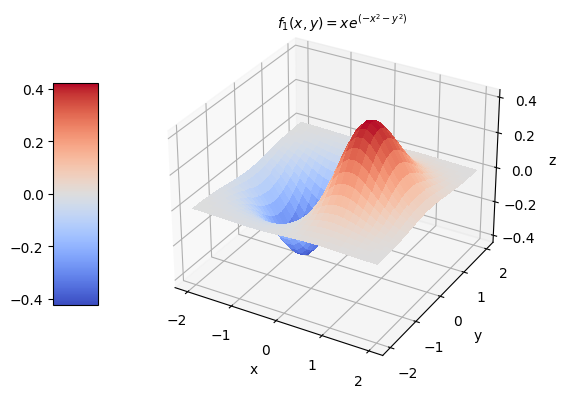

In [43]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.rcParams['legend.fontsize'] = 10
linspace_x = torch.linspace(-2, 2, steps=30)
linspace_y = torch.linspace(-2, 2, steps=30)
X, Y = torch.meshgrid(linspace_x, linspace_y, indexing="xy")
Z = f(X, Y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.text2D(0.35, 0.95, r'$f_{1}(x,y)=xe^{(-x^{2}-y^{2})}$', transform=ax.transAxes)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.6, aspect=5, location='left')
plt.show()


Lorem ipsum dolor sit amet, consectetur adipiscing elit. Etiam quis tristique tortor. Nunc porta egestas lacus vel eleifend. Fusce vulputate libero quis libero aliquam, non auctor elit pretium. Vestibulum faucibus, sapien at luctus eleifend, risus tellus bibendum mauris, quis ullamcorper est turpis in risus. Quisque id gravida justo. Etiam et volutpat lectus. Duis lobortis orci arcu, sit amet facilisis augue pulvinar vel. Maecenas tortor libero, gravida fringilla quam ac, euismod euismod lorem. Aenean suscipit enim ex, in efficitur quam malesuada at. Donec tempus in dui id blandit. Donec mattis lorem id nulla elementum fermentum. Sed a felis consectetur elit convallis viverra.

2. (10 puntos) Implemente el algoritmo del descenso del gradiente con moméntum:

In [71]:
def gradient_descent_momentum(initial_position, epochs=5, momentum=0.1, alpha=0.05):
    agent = initial_position
    agent.requires_grad = True
    agents = [agent]
    inertia = 0
    for epoc in range(epochs):
        function_eval = f(agent[:1], agent[1:])
        gradient = grad(function_eval, agent, create_graph=True)[0]
        agent = agent - ((momentum * inertia) + alpha * gradient)
        inertia = (momentum * inertia) + alpha * (1 - momentum) * gradient
        theta = agent.detach()
        agents.append(theta)
    agents[0] = agents[0].detach()
    return agents

In [120]:
def plot(thetas, alpha=0.25, momentum=0.5):
    #  Contour plot
    linspace_x = torch.linspace(-2, 2, steps=30)
    linspace_y = torch.linspace(-2, 2, steps=30)
    X, Y = torch.meshgrid(linspace_x, linspace_y, indexing="xy")
    Z = f(X, Y)
    fig = plt.figure(figsize=plt.figaspect(0.4))
    ax = fig.add_subplot(1, 2, 1)
    cp = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
    fig.colorbar(cp)  # Add a color bar to a plot
    ax.set_title(r'$f_{1}(x,y)=xe^{(-x^{2}-y^{2})}$')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    thetas = torch.stack(thetas)
    agents_x = thetas[:, 0]
    agents_y = thetas[:, 1]
    ax.scatter(agents_x, agents_y, s=40, lw=0, color='yellow', label=r'HELLO')
    plt.quiver(agents_x[:-1], agents_y[:-1], agents_x[1:]-agents_x[:-1], agents_y[1:]-agents_y[:-1], scale_units='xy', angles='xy', scale=1)

    #  3D plot
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    agents_z = f(agents_x, agents_y)
    ax.scatter(agents_x, agents_y, agents_z, s=40, lw=0, color='yellow', alpha=1)
    ax.plot_surface(X, Y, Z,  rstride=1, cstride=1, cmap=cm.coolwarm, edgecolor='none', alpha=0.5)
    ax.text2D(0.35, 0.95, r'$f_{1}(x,y)=xe^{(-x^{2}-y^{2})}$', transform=ax.transAxes)
    ax.quiver(agents_x[:-1], agents_y[:-1], agents_z[:-1], (agents_x[1:]-agents_x[:-1]), (agents_y[1:]-agents_y[:-1]), (agents_z[1:]-agents_z[:-1]), length=1)
    plt.show()

    #  Results
    thetas_list = ""
    for theta in range(len(thetas)):
        thetas_list += "epoch " + str(theta) + ": $\\theta_{" + str(theta) + "}=" + str(round(thetas[theta][0].item(), 2)) + "," + str(round(thetas[theta][1].item(), 2)) + "$ \n"
    minimums = ""
    for minimum in range(len(agents_z)):
        minimums += "$f(\\theta_{" + str(minimum) + "})=" + str(round(agents_z[minimum].item(),2)) + "$ \n"


    plt.figure(figsize=(5, 1.5))

    plt.text(-0.8, 0.5, thetas_list, ha='left', size=20)
    plt.text(0.6, 0.5, minimums, ha='left', size=20)
    plt.text(0.2, 4.5, "GDM with $\\alpha=" + str(alpha) + ", \\gamma=" + str(momentum) + "$", ha='center', va='baseline', size=20)
    plt.axis('off')
    plt.show()

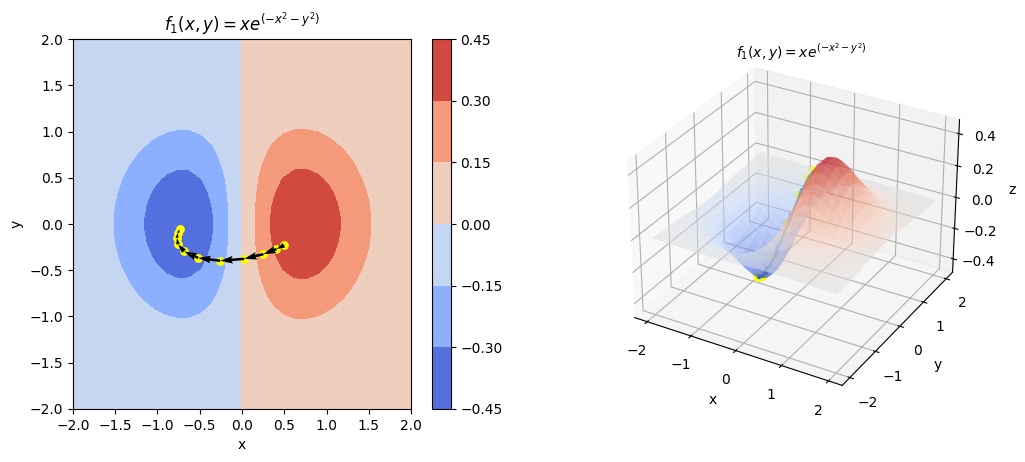

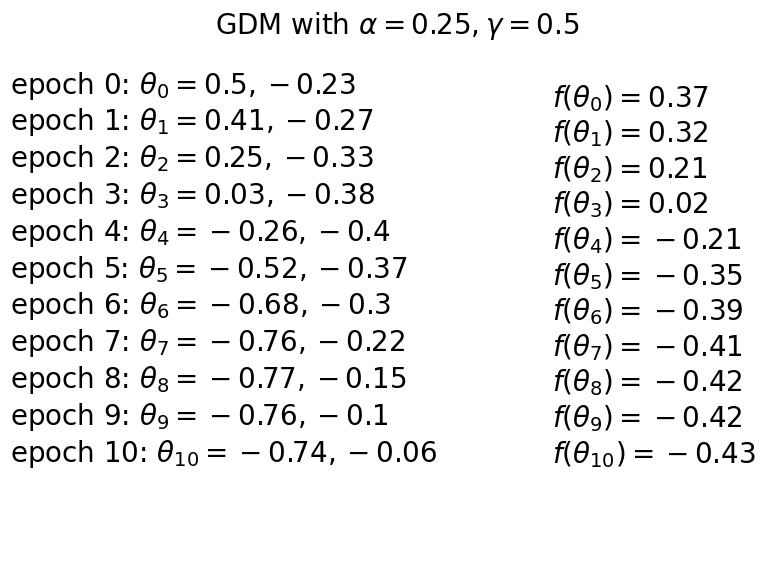

In [118]:
# TODO
# tolerancia = ?
# cantidad_iteraciones = ?
# punto_convergencia = ?
# LOOP 10 corridas, guardar resultados en una lista (los thetas), escoger uno aleatoreamente y graficarlo

# Gradient descent execution
init_position = torch.Tensor([0.5, -0.23])
thetas = gradient_descent_momentum(init_position, epochs=10, alpha=0.25, momentum=0.5)
plot(thetas)